## Amostragem preferencial

Documento criado com o objetivo de apresentar considerações sobre a importância da 'amostragem preferencial' em métodos de interpolação vistos na disciplina de matemática computacional (CAP-239-4), do curso de pós-graduação em Computação Aplicada do Instituto Nacional de Pesquisas Espaciais

Docentes:
- Dr. Leonardo B. L. Santos
- Dr. Reinaldo Rosa

Discente:
- Felipe Menino Carlos

<hr>

Para a apresentação da utilidade da amostragem preferencial, façamos a consideração do problema de interpolação da curva de absorção da água no espectro eletromagnético.

In [1]:
import numpy as np
import pandas as pd
import scipy.interpolate
import matplotlib.pyplot as plt

Inicialmente, vamos carregar os dados de absorção e visualizar seu formato.

In [2]:
aw = pd.read_csv('dados/aw_pope97.csv', sep = ';')
aw = aw.set_index('Wave')

Text(0.5, 1.0, 'Espectro de absorção da água')

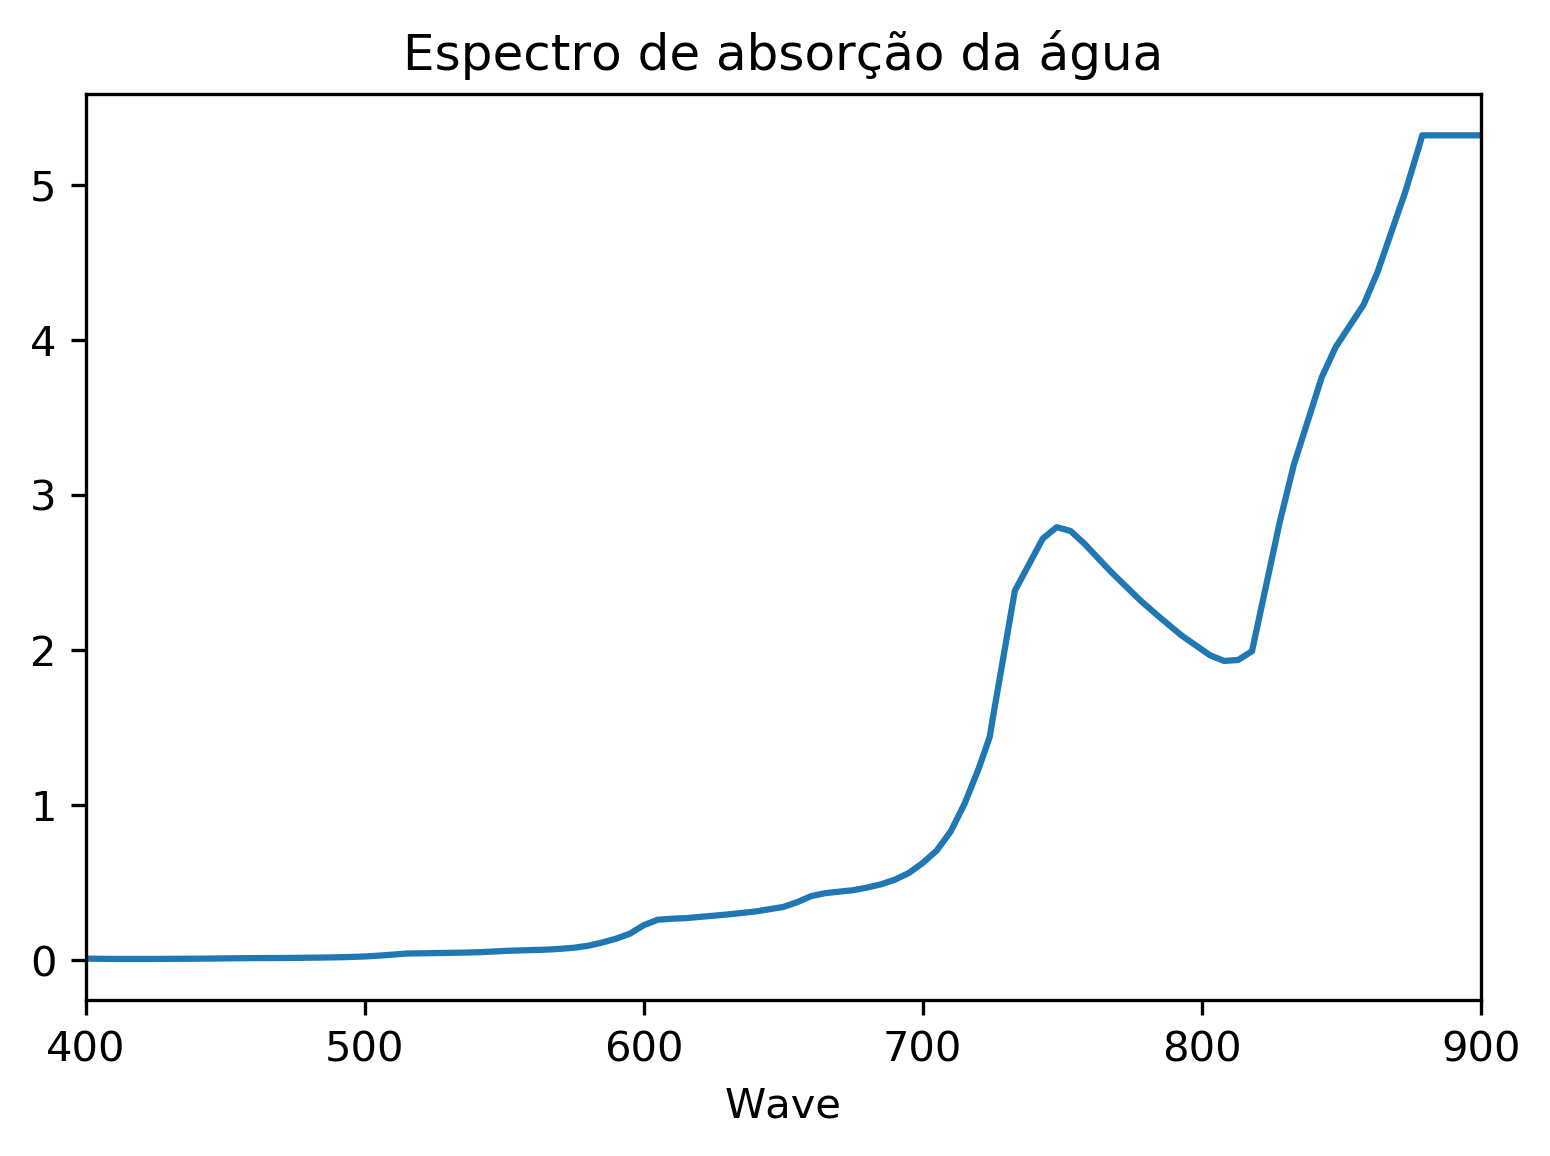

In [3]:
plt.figure(dpi = 300)
aw['Abs'].plot()
plt.title("Espectro de absorção da água")

<hr>

Interpolando com o método de lagrange considerando pontos que em certas partes não representa de uma forma clara o comportamento do espectro. Ao fazer o teste será possível perceber o comportamento indevido do polinômio que foi gerado.

Para a seleção de pontos, foram considerados diversos ao longo do espectro de absorção 

In [4]:
pontos = [400, 500, 550, 600, 650, 700, 760, 780, 810, 850, 870]

Com os pontos definidos a interpolação é realizada

In [5]:
l_awabs = scipy.interpolate.lagrange(pontos, aw['Abs'].loc[pontos].values)
valores_interpolados = l_awabs(np.arange(400, 870))

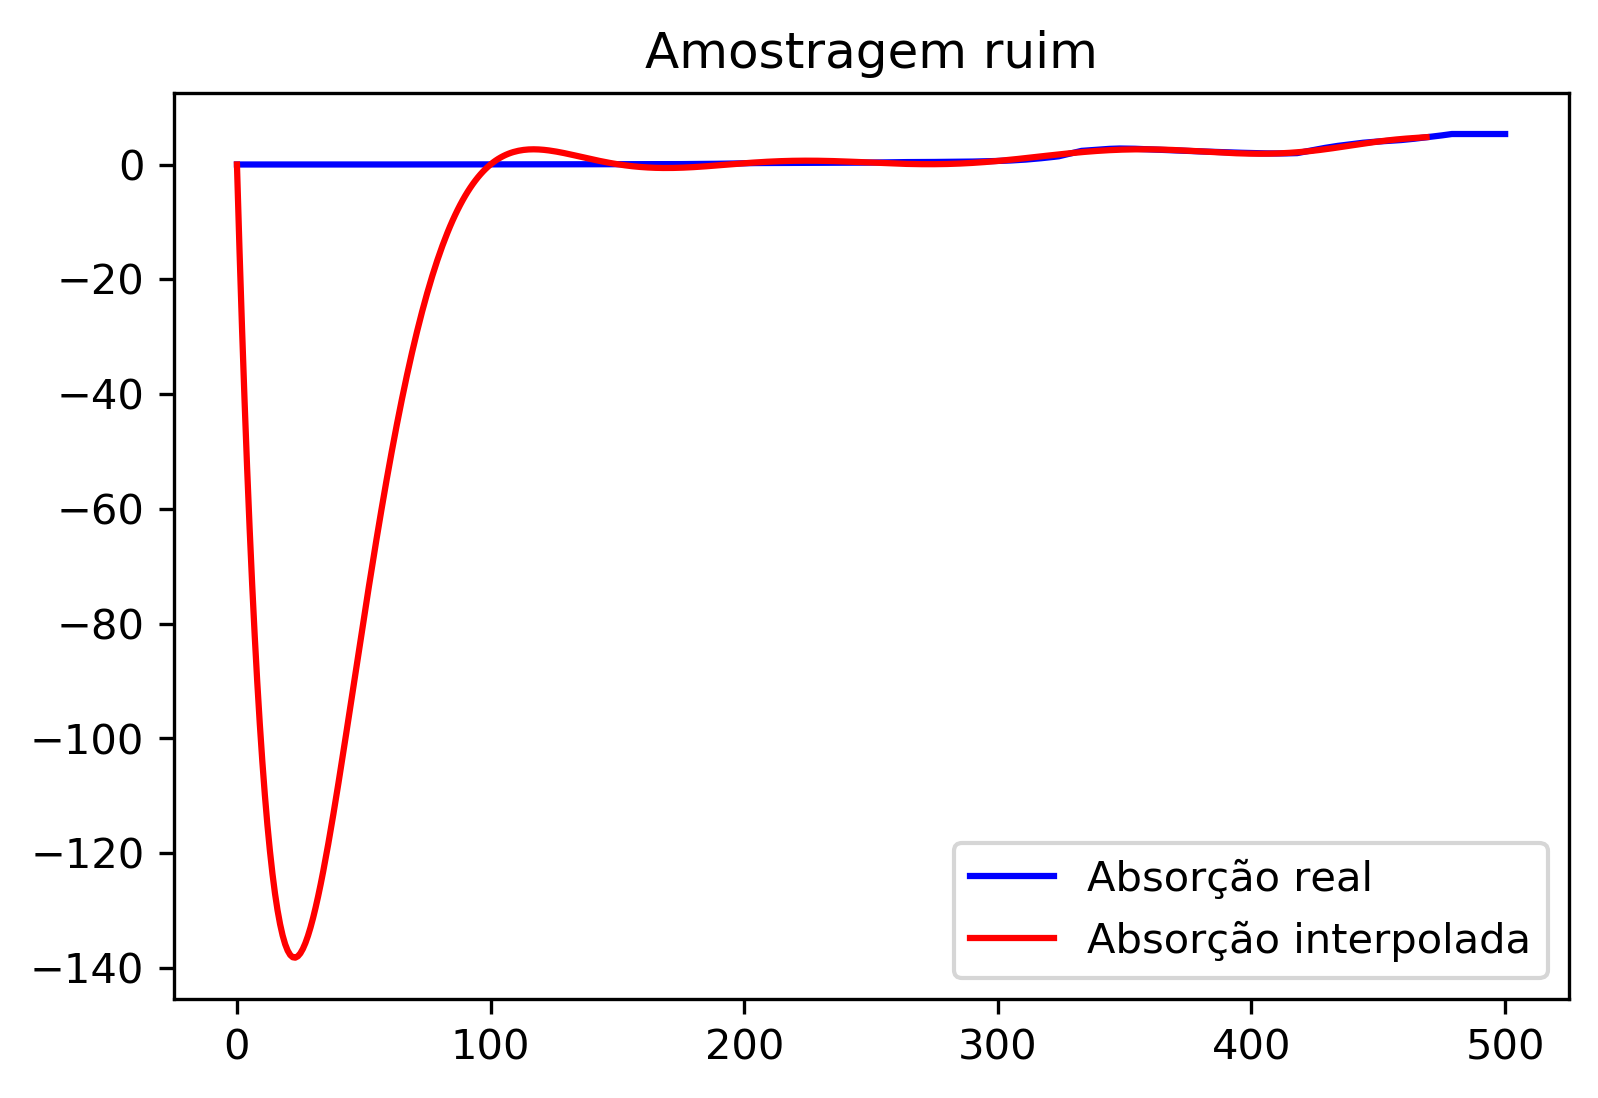

In [6]:
plt.figure(dpi = 300)
plt.title("Amostragem ruim")
plt.plot(aw['Abs'].values, color = 'blue')
plt.plot(valores_interpolados, color = 'red')
plt.legend(['Absorção real', 'Absorção interpolada'])

Como citado anteriormente, a seleção dos pontos acabou abrindo margem para comportamentos não esperados da interpolação.

Para resolver tal problema, façamos a seleção de pontos que cubra a parte do espectro que ficou com problemas na interpolação.

In [7]:
pontos = [400, 401, 405, 501, 500, 550, 600, 650, 700, 760, 780, 810, 850, 870]

Interpolando

In [8]:
l_awabs = scipy.interpolate.lagrange(pontos, aw['Abs'].loc[pontos].values)
valores_interpolados = l_awabs(np.arange(400, 870))

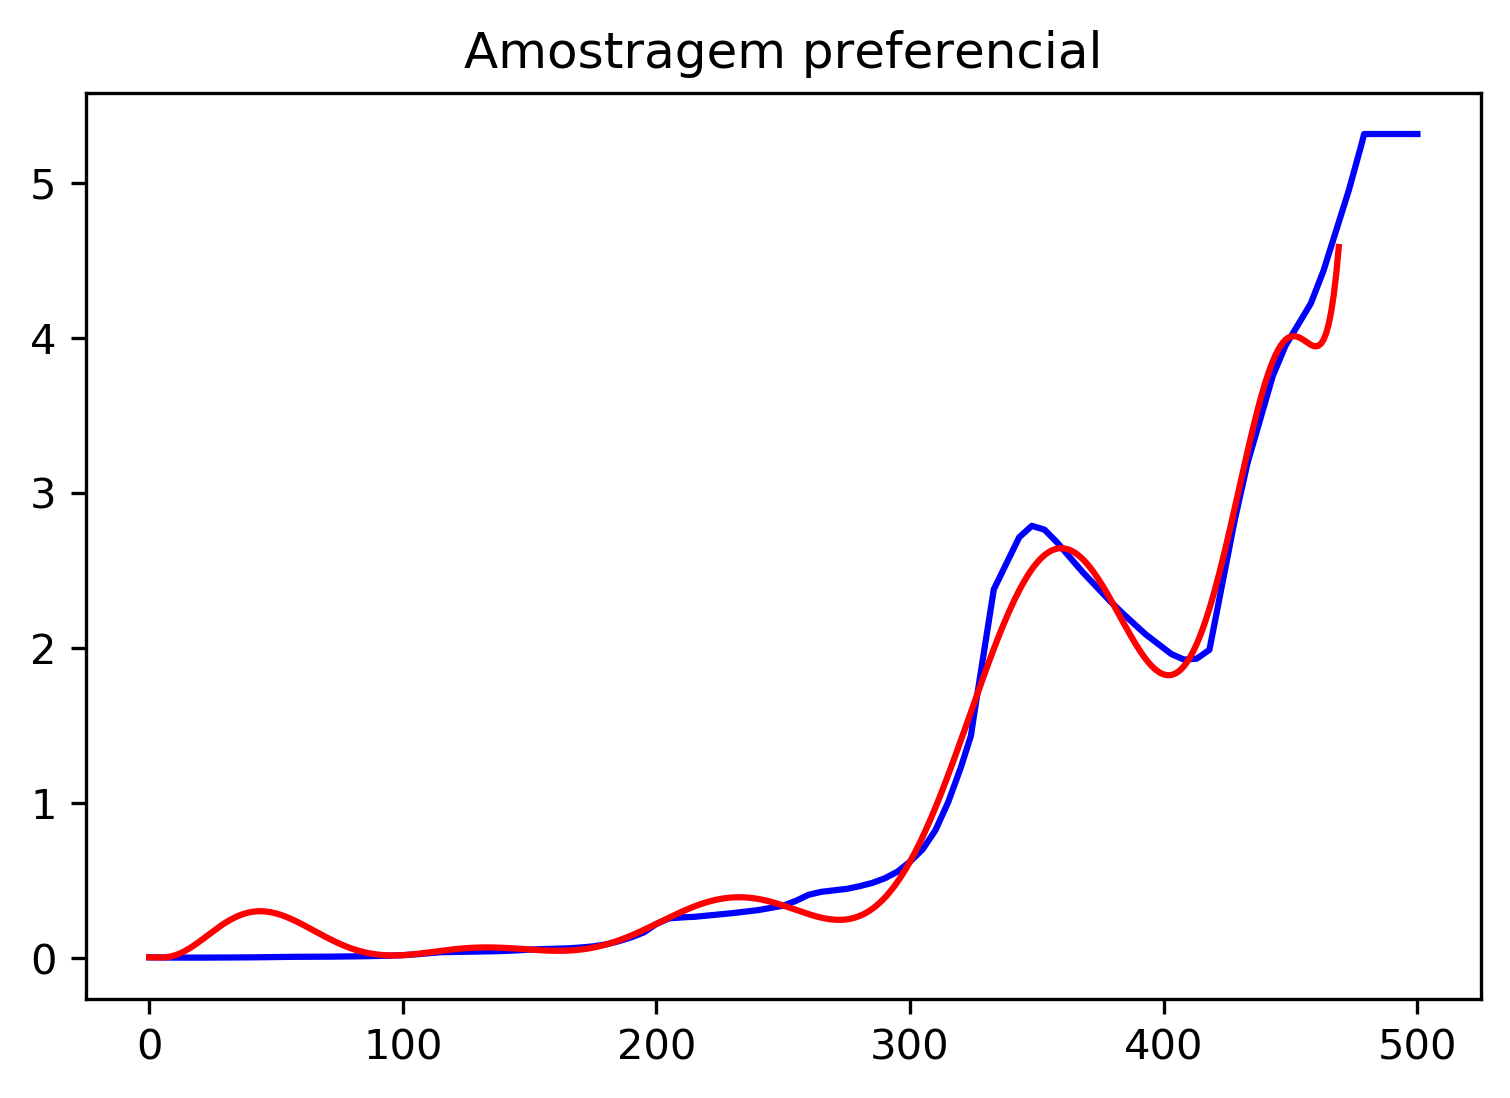

In [9]:
plt.figure(dpi = 300)
plt.title("Amostragem preferencial")
plt.plot(aw['Abs'].values, color = 'blue')
plt.plot(valores_interpolados, color = 'red')

Veja que interessante, apenas com uma seleção melhor dos pontos o resultado da interpolação foi melhor. E com isto é possível perceber a importância da amostragem preferencial.